# 1
Machine learning is an effective tool for solving a variety of problems but it isn't always the best option. Identifying the nature of the problem, the availability and quality of data, and the capabilities and constraints associated are all necessary for determining whether to use machine learning or not. Machine learning is best suited when the relationship between variables is complex or difficult to understand. Machine learning helps find hidden trends and truths that we may miss. When there is a large volume of data available the algorithm has more opportunity to learn and generalize patterns correctly. Machine learning succeeds in cases requiring quick and unsupervised decision making, such as detecting fraud in transactions or personalizing recommendations from customers. Machine learning is useful for forecasting customer behavior and detecting data variations. Some examples of when to use machine learning are medical diagnostics, spam detection, user recommendations for social media, and fraud detection.
Machine learning may not be the ideal option when algorithms need large, clean, and accurate data to learn significant patterns. If the supplied data is insufficient or has poor quality then ML isn't helpful. If a challenge can be solved using simple rules or calculations then machine learning isn't effective. Advanced machine learning models can lack accountability making it difficult for users to comprehend and verify their results. Developing and implementing machine learning models may require a lot of computing power and understanding. Some examples of when to not use ML are when you have no data avalible, you have no tolerance for mistakes, and if there is no supervision of the results.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [185]:
data_df = pd.read_csv("titanic.csv")
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2

we want to convert cabin values to indicate whether the passenger has a cabin or not. Fill in all the missing age values with the median

In [188]:
# new binary column to show if passengers had a cabin or not
data_df['HasCabin'] = data_df['Cabin'].notna().astype(int)
# missing age values to median
data_df['Age'] = data_df['Age'].fillna(data_df['Age'].median())
# striping names to just have the titles for people.
data_df["Title"] = data_df["Name"].str.extract(' ([A-Za-z]+)\.')
data_df['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [189]:
data_df['Title'] = data_df['Title'].replace(['Dr', 'Rev', 'Countess', 'Jonkheer', 'Lady', 'Don'], 'Other')
data_df['Title'] = data_df['Title'].replace('Ms', 'Miss')
data_df['Title'] = data_df['Title'].replace('Mme', 'Mrs')
data_df['Title'] = data_df['Title'].replace('Mlle', 'Miss')
data_df['Title'] = data_df['Title'].replace(['Sir', 'Capt', 'Major', 'Col'], 'Mr')
data_df.head()
data_df['Title'].value_counts()

Title
Mr        523
Miss      185
Mrs       126
Master     40
Other      17
Name: count, dtype: int64

Use map to turn 'sex' and 'embarked' into numerical values.
Male = 0, Female = 1;
C = 0, Q = 1, S = 2;
Mr = 0, Miss = 1, Mrs = 2, Master = 3, Other = 4

In [190]:
data_df['Sex'] = data_df['Sex'].map({'male':0, 'female':1})
data_df['Embarked'] = data_df['Embarked'].map({'C':0, 'Q':1, 'S':2})
data_df['Title'] = data_df['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Other':4})
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0,1,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0,0,0


Remove unnecessary columns (passangerID, ticket, cabin, names)

In [191]:
data_df = data_df.drop(columns=['PassengerId','Ticket','Cabin','Name'])
data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title
0,0,3,0,22.0,1,0,7.2500,2.0,0,0
1,1,1,1,38.0,1,0,71.2833,0.0,1,2
2,1,3,1,26.0,0,0,7.9250,2.0,0,1
3,1,1,1,35.0,1,0,53.1000,2.0,1,2
4,0,3,0,35.0,0,0,8.0500,2.0,0,0


# 3

<Axes: >

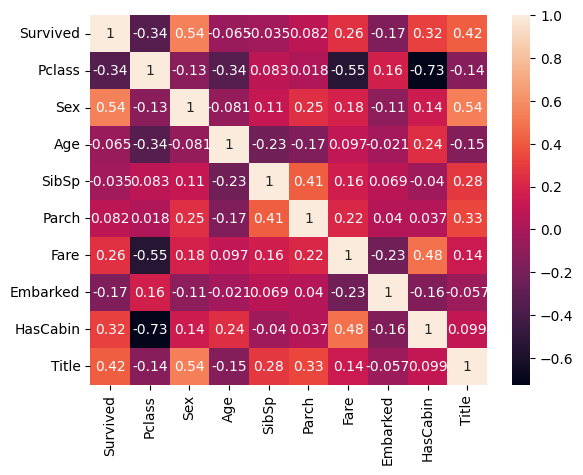

In [192]:
sns.heatmap(data_df.corr(),annot=True)

There is a positive correlation between sex and survival (0.54) females are more likey to survive then males, positive correlation between title and survival (0.42), positive correlation between having a cabin and surviving (0.32), positive correlation between fares and survival (0.26), and a negative correlation between passenger class and survival (-0.34).

# 4

<Axes: xlabel='Fare'>

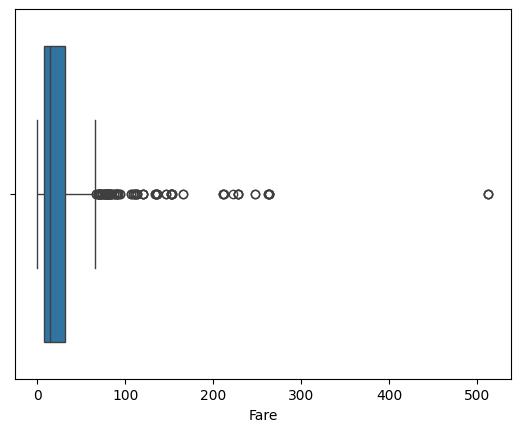

In [193]:
data_df.dropna(subset=['Fare'], inplace=True)
sns.boxplot(x='Fare', data=data_df)

There are many exterme outliers who paided more in fares then 75% of the passangers, most of the fare were within the range of $100 to $0.

# 5
Using lambda to perform this is more effecient and for me personallly it is easier to understand. First lamda checks to see id x is less then or equal to 18, then then if x is less then or equal to 30 is the next lambda.

In [201]:
age_bins = [0, 18, 30, 60, float('inf')]
age_labels = ['Child', 'Young_Adult', 'Adult', 'Senior']
data_df['age_bin2'] = pd.cut(data_df['Age'], bins=age_bins, labels=age_labels, right=False)

In [202]:
data_df['age_bin'] = data_df['Age'].apply(lambda x: 'Child' if x <= 18 
                                          else ('Young_Adult' if x <= 30 
                                                else ('Adult' if x <= 60 
                                                      else 'Senior')))

data_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,HasCabin,Title,age_bin,age_bin2
0,0,3,0,22.0,1,0,7.2500,2.0,0,0,Young_Adult,Young_Adult
1,1,1,1,38.0,1,0,71.2833,0.0,1,2,Adult,Adult
2,1,3,1,26.0,0,0,7.9250,2.0,0,1,Young_Adult,Young_Adult
3,1,1,1,35.0,1,0,53.1000,2.0,1,2,Adult,Adult
4,0,3,0,35.0,0,0,8.0500,2.0,0,0,Adult,Adult
5,0,3,0,28.0,0,0,8.4583,1.0,0,0,Young_Adult,Young_Adult
6,0,1,0,54.0,0,0,51.8625,2.0,1,0,Adult,Adult
7,0,3,0,2.0,3,1,21.0750,2.0,0,3,Child,Child
8,1,3,1,27.0,0,2,11.1333,2.0,0,2,Young_Adult,Young_Adult
9,1,2,1,14.0,1,0,30.0708,0.0,0,2,Child,Child


# 6


What the histograms tell is that the fares are grouped near 0, passanger bellow the age of 18 paided the lowest fares, then the passagers in the 19 to 30 age range paided ~ $25, passangers from ages 30 to 60 a lot of them rode for free, then passanger 60+ hand some outliers who paid a lot of money to be on the titanic.

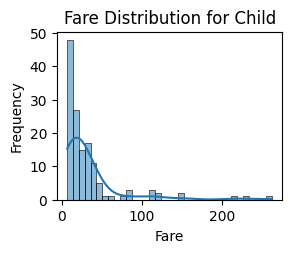

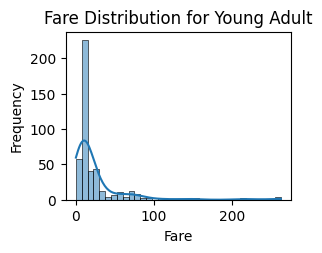

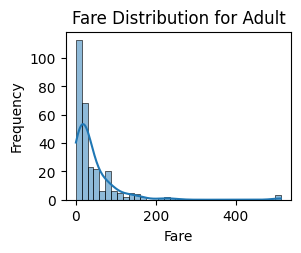

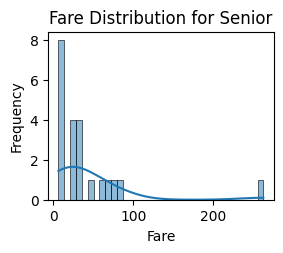

In [239]:
# Fare for child
plt.subplot(2, 2, 2)
sns.histplot(data=data_df[data_df['age_bin']=='Child'],x='Fare',bins=35, kde=True)
plt.title(f'Fare Distribution for Child')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Fare for young adult
plt.subplot(2, 2, 2)
sns.histplot(data=data_df[data_df['age_bin']=='Young_Adult'],x='Fare',bins=35, kde=True)
plt.title(f'Fare Distribution for Young Adult')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Fare for adult
plt.subplot(2, 2, 2)
sns.histplot(data=data_df[data_df['age_bin']=='Adult'],x='Fare',bins=35, kde=True)
plt.title(f'Fare Distribution for Adult')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Fare for senior
plt.subplot(2, 2, 2)
sns.histplot(data=data_df[data_df['age_bin']=='Senior'],x='Fare',bins=35, kde=True)
plt.title(f'Fare Distribution for Senior')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()